In [1]:
import ROOT as RT

Welcome to ROOTaaS 6.06/08


In [4]:
RT.gROOT.LoadMacro("IsolationCorrection.C++")

0

Info in <TUnixSystem::ACLiC>: creating shared library /mnt/t3nfs01/data01/shome/musella/Analysis/jupyter/diphotons/./IsolationCorrection_C.so


In [5]:
isoCorr = RT.IsolationCorrection("corrections.root")

In [6]:
#RT.getIsoCorrection("corrections.root")

In [7]:
isoCorr.histograms_.size()

288L

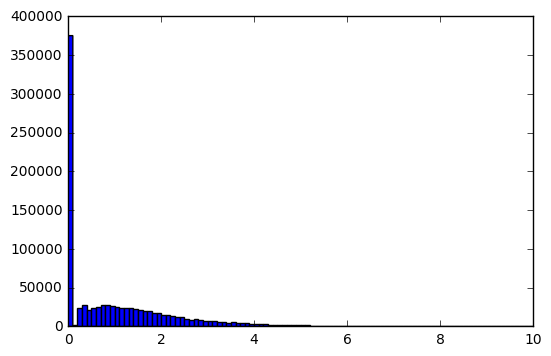

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(np.array(map(lambda x: isoCorr.getExtra(1.,100.), xrange(1000000))),100);